# This AI model will be able to recognise objects like animals, airplane, ships, etc. and classify them accordingly. The AI model will train and test on CIFAR-10 data-set using Convolutional Neural Network method.

In [93]:
import tensorflow as tf # package providing the framework for building the model

## Loading CIFAR-10 Data-set. It consists of 50000 training coloured images and 10000 testing coloured (RGB) images; each of size 32x32. There are 10 classes viz. "airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"

### Tensorflow already has it. We can load it using Keras.

In [94]:
cifar = tf.keras.datasets.cifar10

# Unpacking and splitting the data-sets into training and testing images
(xTrain, yTrain), (xTest, yTest) = cifar.load_data()

In [95]:
# CIFAR-10 data contains 50000 training samples and 10000 testing samples
print("The length of training set (x) is", len(xTrain))
print("The length of training set (y) is", len(yTrain))
print("The length of testing set (x) is", len(xTest))
print("The length of testing set (y) is", len(yTest), end="\n\n")

# Shape of the image is 32x32
print("The shape of the 6th element in the training set is", xTrain[5].shape)
print("The 6th element from the training set consists of:-\n", xTrain[5])

The length of training set (x) is 50000
The length of training set (y) is 50000
The length of testing set (x) is 10000
The length of testing set (y) is 10000

The shape of the 6th element in the training set is (32, 32, 3)
The 6th element from the training set consists of:-
 [[[159 102 101]
  [150  91  95]
  [153  95  97]
  ...
  [ 91  71  56]
  [ 74  63  55]
  [ 76  58  55]]

 [[142  75  68]
  [146  72  66]
  [155  76  65]
  ...
  [127 105  71]
  [122 111  93]
  [ 86  69  61]]

 [[109  67  75]
  [ 99  58  60]
  [105  59  52]
  ...
  [137 112  80]
  [163 132 105]
  [ 93  72  71]]

 ...

 [[244 129  70]
  [240 123  65]
  [241 122  65]
  ...
  [156  42  15]
  [179  59  26]
  [200  73  36]]

 [[246 133  74]
  [243 128  72]
  [243 127  70]
  ...
  [162  44  14]
  [178  56  22]
  [192  65  27]]

 [[246 139  82]
  [243 133  78]
  [244 132  77]
  ...
  [166  47  14]
  [173  51  17]
  [182  57  19]]]


## Importing matplotlib to plot and view images and numpy to handle arrays and other mathematical operations

In [96]:
import matplotlib.pyplot as plt
import numpy as np

## Visualising some sample images

In [97]:
# First we will make a tuple named 'classes' which will store all the class
# names of the data-set in the same order as is in CIFAR-10 data-set
classes = (
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
)

# now reshaping yTrain and yTest so that it becomes a one-dimensional array and
# we can access its data with just one index
yTrainr = yTrain.reshape(-1, )
yTestr = yTest.reshape(-1, )
print("The original and reshaped train versions:", yTrain[: 4], yTrainr[: 4],
      sep="\n")
print("The original and reshaped test versions:", yTest[: 4], yTestr[: 4],
      sep="\n")

# function to plot an image
# x and y can be training/test sets index is the index whose image we want to
# plot
def plotImage(x, y, index):
    plt.figure(figsize=(15, 1.5))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

The original and reshaped train versions:
[[6]
 [9]
 [9]
 [4]]
[6 9 9 4]
The original and reshaped test versions:
[[3]
 [8]
 [8]
 [0]]
[3 8 8 0]


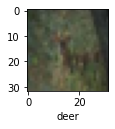

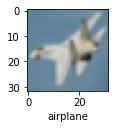

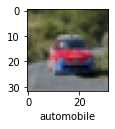

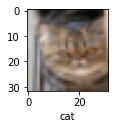

In [98]:
# Plotting some images
plotImage(xTrain, yTrainr, 10)
plotImage(xTest, yTestr, 10)
plotImage(xTrain, yTrainr, 6969)
plotImage(xTest, yTestr, 4987)

## Resizing image to make it suitable for applying Convolution operations

In [99]:
IMG_SIZE = 32
# increasing by one dimension (making it 4-dimensional) so that it can work with
# Keras API
xTrainr = np.array(xTrain).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
xTestr = np.array(xTest).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

print("Training samples:", xTrainr.shape)
print("Testing samples:", xTestr.shape)

Training samples: (50000, 32, 32, 3)
Testing samples: (10000, 32, 32, 3)


## Scaling/Normalisation: division by 255 to bring in the range 0 to 1

In [100]:
xTrainr = xTrainr / 255
xTestr = xTestr / 255

print("The reshaped and normalised (1st training image) image is:", xTrainr[0],
      sep="\n", end="\n\n")
print("The reshaped and normalised (1st testing image) image is:", xTestr[0],
      sep="\n")

The reshaped and normalised (1st training image) image is:
[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0

## Creating the Deep Neural Netwrok and training on 50000 training samples

In [101]:
# Importing the required functions
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, MaxPool2D
from tensorflow.keras.layers import Flatten, Conv2D, Dropout

In [102]:
# Creating a simple neural network
or_model = Sequential() # Sequential allows to build a model layer by layer

# First Convolutional Layer
# (input layer size is mentioned for only first layer)
or_model.add(Conv2D(50, kernel_size=(3, 3), input_shape=(32, 32, 3),
                    strides=(1, 1), padding='same', activation='relu'))
# maxpooling single maximum value of 2x2
or_model.add(MaxPool2D(pool_size=(2, 2))) # selects the maximum element from
                                          # each region of the feature map
                                          # reducing the size by half

# Second Convolutional Layer
or_model.add(Conv2D(100, kernel_size=(3, 3), strides=(1, 1), padding='same',
                    activation='relu'))
or_model.add(MaxPool2D(pool_size=(2, 2)))
or_model.add(Dropout(0.3)) # to avoid overfitting

# Third Convolutional Layer
or_model.add(Conv2D(150, kernel_size=(3, 3), strides=(1, 1), padding='same',
                    activation='relu'))
or_model.add(MaxPool2D(pool_size=(2, 2)))
or_model.add(Dropout(0.3))

# Now we shall flatten (transfroming into a single column) the feature map
# matrix before connecting the layers fully
or_model.add(Flatten())

# Creating the dense layer (fully connecting the each layer to the next layer)
or_model.add(Dense(400, activation='relu')) # connecting first layer
or_model.add(Dropout(0.4))

or_model.add(Dense(200, activation='relu')) # connecting layer 2
or_model.add(Dropout(0.4))

# Last fully connected layer, where the output must be equal to number of
# classes, 10, that is
or_model.add(Dense(10))
or_model.add(Activation("softmax")) # class probabilities

# Displaying the or_model summary
or_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 50)        1400      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 50)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 100)       45100     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 8, 8, 100)        0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 8, 8, 100)         0         
                                                                 
 conv2d_14 (Conv2D)          (None, 8, 8, 150)        

## Compiling the AI model

In [103]:
## Compiling our AI model
or_model.compile(
    optimizer="adam", # controls the learning rate
    loss="sparse_categorical_crossentropy", # estimates the loss of the model
    metrics=['accuracy']
)

## Training the model with the training dataset

In [104]:
or_model.fit(xTrainr, yTrain, batch_size=128, epochs=30, validation_split=0.3,
             validation_data=(xTestr, yTest))

Epoch 1/30
274/274 [==============================] - 64s 230ms/step - loss: 1.8005 - accuracy: 0.3247 - val_loss: 1.4691 - val_accuracy: 0.4712
Epoch 2/30
274/274 [==============================] - 65s 236ms/step - loss: 1.3552 - accuracy: 0.5055 - val_loss: 1.1922 - val_accuracy: 0.5631
Epoch 3/30
274/274 [==============================] - 65s 237ms/step - loss: 1.1659 - accuracy: 0.5854 - val_loss: 1.0369 - val_accuracy: 0.6309
Epoch 4/30
274/274 [==============================] - 67s 245ms/step - loss: 1.0544 - accuracy: 0.6303 - val_loss: 0.9652 - val_accuracy: 0.6652
Epoch 5/30
274/274 [==============================] - 67s 245ms/step - loss: 0.9622 - accuracy: 0.6632 - val_loss: 0.8999 - val_accuracy: 0.6845
Epoch 6/30
274/274 [==============================] - 69s 251ms/step - loss: 0.8961 - accuracy: 0.6899 - val_loss: 0.8485 - val_accuracy: 0.7022
Epoch 7/30
274/274 [==============================] - 71s 260ms/step - loss: 0.8341 - accuracy: 0.7094 - val_loss: 0.7687 - val_ac

## Evaluation of the model on the basis of the test data set

In [105]:
or_model.evaluate(xTest, yTest)

313/313 [==============================] - 5s 15ms/step - loss: 198.7885 - accuracy: 0.5061


[198.78846740722656, 0.5060999989509583]

## The model making predictions

In [120]:
classesIdx = range(0, 10)
# zipping the classesIdx and classes to make a dictionary of class_label
classLabels = dict(zip(classesIdx, classes))

# generating batch of 9 images to predict
batch = xTestr[1000: 1009]
labels = np.argmax(yTest[100: 109], axis=(-1))

# making predictions
yPredictions = or_model.predict(batch)

print("The predictions arrays are:-\n", yPredictions)

The predictions arrays are:-
 [[1.38543857e-10 1.62650296e-10 4.60280580e-06 1.56377163e-03
  2.43626239e-08 9.98371065e-01 1.17655681e-08 6.04235429e-05
  6.93703273e-09 6.20449399e-08]
 [9.82645869e-01 1.47834326e-05 6.19713799e-04 3.11944095e-05
  8.91878699e-06 3.80871938e-07 3.63596450e-06 3.62297419e-06
  1.52992634e-02 1.37260905e-03]
 [1.48830330e-02 2.34705061e-02 2.36468818e-02 2.24609524e-01
  5.36386818e-02 1.21797733e-02 4.70059253e-02 1.62451770e-02
  5.63778818e-01 2.05416959e-02]
 [6.48040954e-09 1.92972947e-11 2.80625070e-04 2.65646406e-04
  9.30158257e-01 2.04335861e-02 2.17801767e-06 4.88597788e-02
  3.41335338e-09 1.47707813e-09]
 [4.02979478e-02 1.93808210e-05 1.66881626e-04 4.86575073e-06
  2.54055271e-06 1.59862722e-07 1.63520610e-06 1.35325934e-06
  9.59279895e-01 2.25449796e-04]
 [4.81963025e-06 9.99137998e-01 5.47605516e-09 2.82604145e-08
  2.52884685e-10 3.97140854e-09 3.74867746e-08 1.69467995e-08
  1.08860666e-04 7.48260121e-04]
 [2.06363482e-09 9.99995708e

Predicted class of the object: automobile
Correct Prediction!
Predicted class of the object: truck
Correct Prediction!
Predicted class of the object: frog
Correct Prediction!
Predicted class of the object: deer
Incorrect Prediction!
Predicted class of the object: automobile
Correct Prediction!


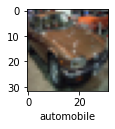

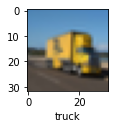

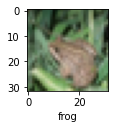

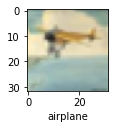

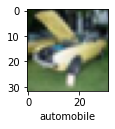

In [121]:
# Checking whether the predictions are correct or not.
yPredictions = or_model.predict(xTestr)
yPredictedClasses = [np.argmax(probability) for probability in yPredictions]

# Function to check if the prediction was correct
def ifPredictionCorrect(index):
    # plotting the image first
    plotImage(xTest, yTestr, index)

    print("Predicted class of the object:", classes[yPredictedClasses[index]])
    
    if classes[yPredictedClasses[index]] == classes[yTestr[index]]:
        print("Correct Prediction!")
    else:
        print("Incorrect Prediction!")

ifPredictionCorrect(2000)
ifPredictionCorrect(4569)
ifPredictionCorrect(4)
ifPredictionCorrect(1093)
ifPredictionCorrect(9998)

## Final Object Detection

In [ ]:
# fig, axs = plt.subplots(3, 3, figsize=(19, 6))
# fig.subplots_adjust(hspace=1)
# axs = axs.flatten()

# for i, img in enumerate(batch):
#     for key, value in classLabels.items():
#         if classResult[i] == 